# SMS Spam Detection: Exploratory Data Analysis
This notebook focuses on understanding the characteristics of spam and ham messages through data visualization and analysis.


In [2]:
# Required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from wordcloud import WordCloud
import re

In [3]:
# Load data
df = pd.read_csv('/content/drive/My Drive/Portfolio/spam.csv', encoding='latin-1')
df = df.rename(columns={'v1': 'class', 'v2': 'sms'})
df = df[['class', 'sms']]

In [4]:
# 1. Basic Dataset Analysis
print("Dataset Overview:")
print("-----------------")
print(f"Total number of messages: {len(df)}")
print("\nClass Distribution:")
print(df['class'].value_counts(normalize=True))

print("\nSample messages from each class:")
print("\nHam examples:")
print(df[df['class']=='ham']['sms'].head(2))
print("\nSpam examples:")
print(df[df['class']=='spam']['sms'].head(2))

Dataset Overview:
-----------------
Total number of messages: 5572

Class Distribution:
class
ham     0.865937
spam    0.134063
Name: proportion, dtype: float64

Sample messages from each class:

Ham examples:
0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
Name: sms, dtype: object

Spam examples:
2    Free entry in 2 a wkly comp to win FA Cup fina...
5    FreeMsg Hey there darling it's been 3 week's n...
Name: sms, dtype: object


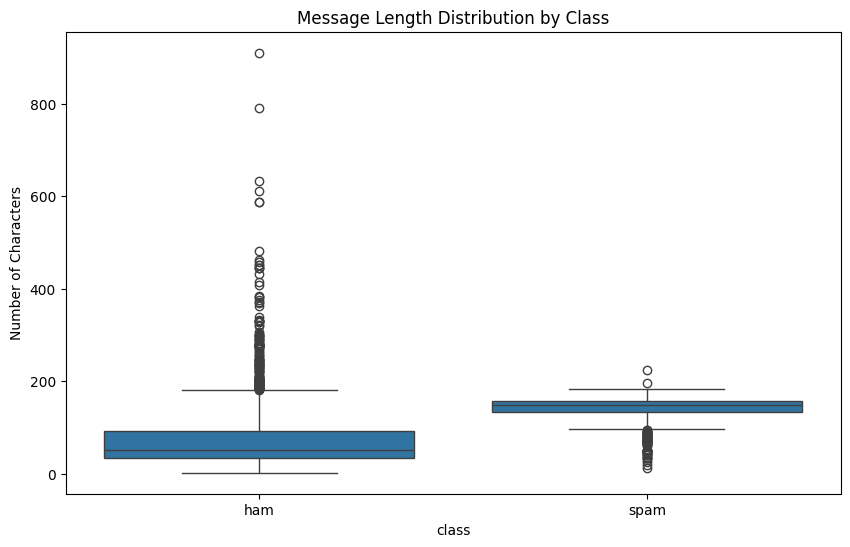


Average message length by class:
class
ham      71.023627
spam    138.866131
Name: message_length, dtype: float64


In [5]:
# 2. Message Length Analysis
df['message_length'] = df['sms'].str.len()

plt.figure(figsize=(10, 6))
sns.boxplot(x='class', y='message_length', data=df)
plt.title('Message Length Distribution by Class')
plt.ylabel('Number of Characters')
plt.show()

print("\nAverage message length by class:")
print(df.groupby('class')['message_length'].mean())

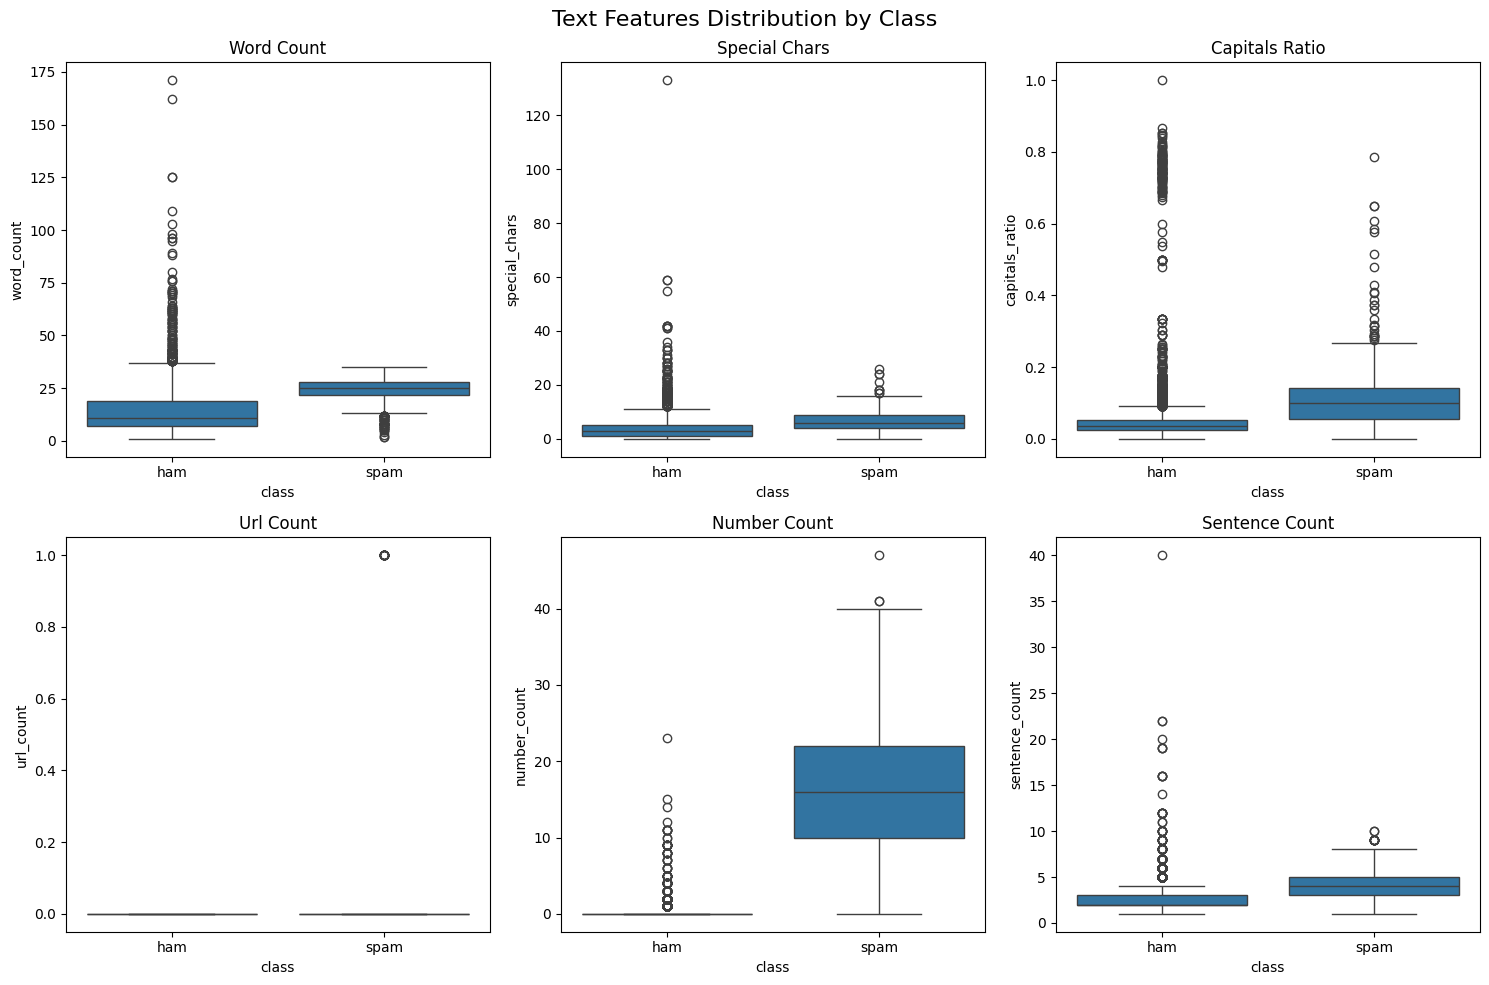

In [6]:
# 3. Text Feature Analysis
def get_text_features(text):
    """
    Extract multiple features from text:
    - Word count
    - Special character count
    - Capital letter ratio
    - URL count
    - Number count
    - Sentence count
    """
    words = len(text.split())
    special_chars = len(re.findall(r'[^a-zA-Z0-9\s]', text))
    capitals = sum(1 for c in text if c.isupper()) / len(text) if len(text) > 0 else 0
    urls = len(re.findall(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', text))
    numbers = len(re.findall(r'\d', text))
    sentences = len(re.findall(r'[.!?]+', text)) + 1

    return pd.Series({
        'word_count': words,
        'special_chars': special_chars,
        'capitals_ratio': capitals,
        'url_count': urls,
        'number_count': numbers,
        'sentence_count': sentences
    })

# Extract features
text_features = df['sms'].apply(get_text_features)
df = pd.concat([df, text_features], axis=1)

# Visualize text features
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Text Features Distribution by Class', fontsize=16)

features = ['word_count', 'special_chars', 'capitals_ratio',
           'url_count', 'number_count', 'sentence_count']

for i, feature in enumerate(features):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x='class', y=feature, data=df)
    plt.title(feature.replace('_', ' ').title())

plt.tight_layout()
plt.show()

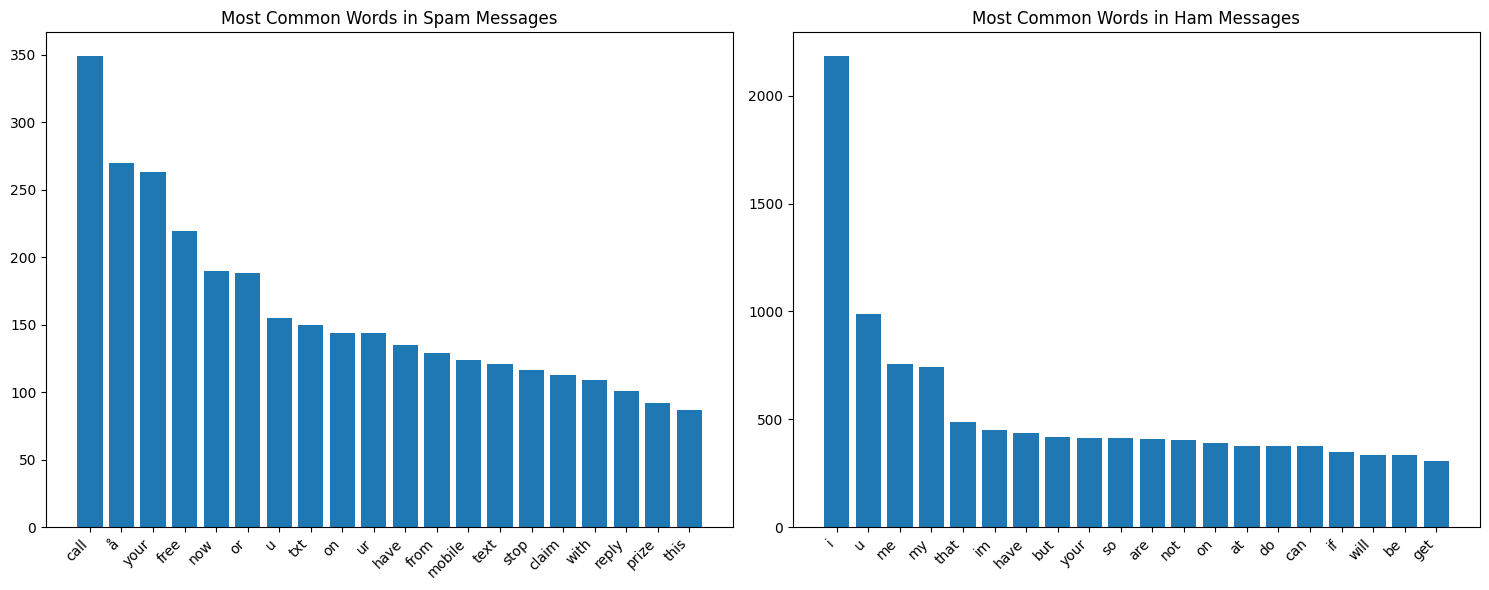

In [7]:
# 4. Word Frequency Analysis
def plot_word_frequencies(df, class_label, n=20):
    """Plot most frequent words for a given class"""
    # Combine all messages
    text = ' '.join(df[df['class'] == class_label]['sms'].str.lower())

    # Remove basic punctuation and numbers
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)

    # Get word frequencies
    words = text.split()
    word_freq = Counter(words)

    # Remove common English words (simple approach)
    common_words = {'the', 'to', 'and', 'a', 'in', 'is', 'it', 'you', 'of', 'for'}
    word_freq = {word: freq for word, freq in word_freq.items() if word not in common_words}

    # Get top N words
    top_words = dict(sorted(word_freq.items(), key=lambda x: x[1], reverse=True)[:n])

    return top_words

# Plot word frequencies
plt.figure(figsize=(15, 6))

# Spam word frequencies
plt.subplot(1, 2, 1)
spam_words = plot_word_frequencies(df, 'spam')
plt.bar(range(len(spam_words)), list(spam_words.values()))
plt.xticks(range(len(spam_words)), list(spam_words.keys()), rotation=45, ha='right')
plt.title('Most Common Words in Spam Messages')

# Ham word frequencies
plt.subplot(1, 2, 2)
ham_words = plot_word_frequencies(df, 'ham')
plt.bar(range(len(ham_words)), list(ham_words.values()))
plt.xticks(range(len(ham_words)), list(ham_words.keys()), rotation=45, ha='right')
plt.title('Most Common Words in Ham Messages')

plt.tight_layout()
plt.show()

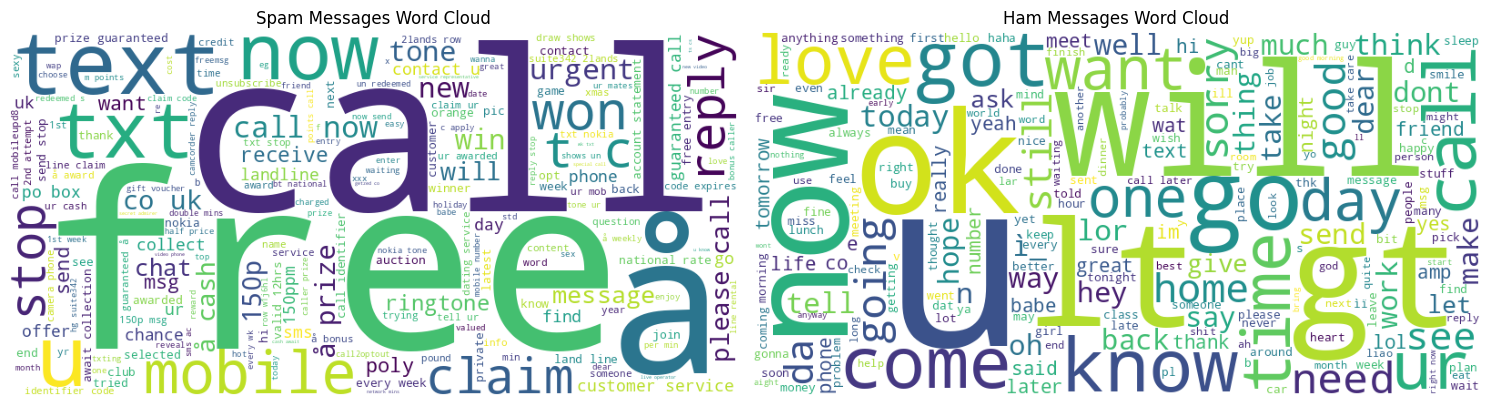

In [8]:
# 5. Word Clouds
plt.figure(figsize=(15, 6))

# Word cloud for spam messages
plt.subplot(1, 2, 1)
spam_text = ' '.join(df[df['class']=='spam']['sms'].str.lower())
wordcloud_spam = WordCloud(width=800, height=400, background_color='white').generate(spam_text)
plt.imshow(wordcloud_spam)
plt.title('Spam Messages Word Cloud')
plt.axis('off')

# Word cloud for ham messages
plt.subplot(1, 2, 2)
ham_text = ' '.join(df[df['class']=='ham']['sms'].str.lower())
wordcloud_ham = WordCloud(width=800, height=400, background_color='white').generate(ham_text)
plt.imshow(wordcloud_ham)
plt.title('Ham Messages Word Cloud')
plt.axis('off')

plt.tight_layout()
plt.show()

In [9]:
# 6. Summary of Findings
print("\nKey Findings from EDA:")
print("----------------------")
print("1. Message Length:")
print(f"   - Average spam message length: {df[df['class']=='spam']['message_length'].mean():.1f} characters")
print(f"   - Average ham message length: {df[df['class']=='ham']['message_length'].mean():.1f} characters")

print("\n2. Text Features:")
for feature in ['word_count', 'special_chars', 'capitals_ratio', 'url_count', 'number_count']:
    spam_mean = df[df['class']=='spam'][feature].mean()
    ham_mean = df[df['class']=='ham'][feature].mean()
    print(f"   - {feature.replace('_', ' ').title()}:")
    print(f"     Spam mean: {spam_mean:.2f}")
    print(f"     Ham mean: {ham_mean:.2f}")


Key Findings from EDA:
----------------------
1. Message Length:
   - Average spam message length: 138.9 characters
   - Average ham message length: 71.0 characters

2. Text Features:
   - Word Count:
     Spam mean: 23.85
     Ham mean: 14.20
   - Special Chars:
     Spam mean: 6.61
     Ham mean: 4.08
   - Capitals Ratio:
     Spam mean: 0.11
     Ham mean: 0.06
   - Url Count:
     Spam mean: 0.03
     Ham mean: 0.00
   - Number Count:
     Spam mean: 15.76
     Ham mean: 0.30
